# Data Wrangling Process

### Sonal Joshi

#### [Dataset](https://www.kaggle.com/datasets/usdot/flight-delays?resource=download)

In [3]:
# Importing the packages
import pandas as pd
import numpy as np

> Loading the flights.csv data in 'path' variable and converting it into a pandas dataframe using pandas library.

In [4]:
# Loading the data as pandas dataframe
path = "/content/drive/MyDrive/Colab Notebooks/data/flights.csv"

# Reading the .csv file and converting it to pandas dataframe
data = pd.read_csv(path)

<ipython-input-4-e41f737e677f>:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


## Data Exploration and Visualization

### a) Explain the data. Find the features in the dataset. Print their names and dimensions.


> This dataset contains information about flights within the United States and includes data on flight delays, cancellations, and diversions for the year 2015.
> The dataset contains several files, including information on flights, airports, and airlines. The flights file, which is the main file of the dataset, contains information about individual flights such as the origin and destination airports, scheduled and actual departure and arrival times, flight duration, and various other details.
>
> This data can be useful to analyze average delays at any particular airport, day and/or airline. Such kind of visualizations can be helpful for customers and airport authorities to improve the services for both staff and customers.
> *.head()* prints the top 5 records and *.display.max_columns* will print all columns even if it doesn't fit the screen size. 

In [5]:
# To display all the columns whenever .head() is used which can be used to pre-process data.
pd.options.display.max_columns = None

# Displays the top 5 rows of pandas dataframe
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


> *.columns* returns all the column names (features) in the dataframe.

In [6]:
# Returns column names in the pandas dataframe
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

> *.shape* returns the number of rows and columns (dimensions) for the dataframe.

In [7]:
# Returns rows and columns as a tuple
data.shape

(5819079, 31)

### b) Plot the data distribution of a few features. Discuss about their mean and variance.

In [8]:
# Importing libraries to plot the features
import matplotlib.pyplot as plt
import seaborn as sns

> Using pivot table method of pandas, the table is indexed by the *'DAY_OF_WEEK'* column, the *'AIRLINE'* column is used for columns and *'DEPARTURE_DELAY'* column is used for values to create the pivot. mean is used to plot the heatmap
>
> The cmap attribute is set to 'coolwarm' to use a color map that ranges from blue to red, and the annot argument is set to True to display the average delay times on each cell of the heatmap. The 'fmt' argument is set to *".1f" *to format the average delay time values to one decimal place.
>
> The visualization is displayed using the pyplot.show method.


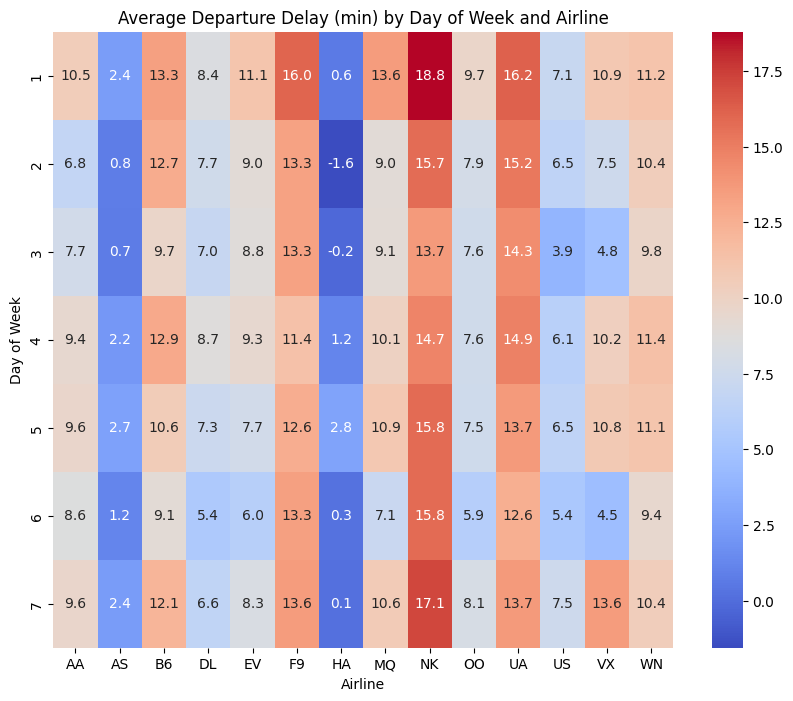

In [9]:
# Create a figure with a larger size
fig, axs = plt.subplots(figsize=(10, 8))

# Create a pivot table of DAY_OF_WEEK vs AIRLINE
# Plot DAY_OF_WEEK vs AIRLINE as a heatmap
sns.heatmap(data.pivot_table(index='DAY_OF_WEEK', columns='AIRLINE', values='DEPARTURE_DELAY', aggfunc='mean'),
            cmap='coolwarm', annot=True, fmt=".1f", ax=axs)

# Set the title, x-axis label, and y-axis label
plt.title("Average Departure Delay (min) by Day of Week and Airline")
plt.xlabel("Airline")
plt.ylabel("Day of Week")

# Displays the heatmap
plt.show()

> The x-axis shows the airline names and the y-axis shows the days of the week. The color of each square in the heatmap indicates the average departure delay time for the corresponding airline and day of the week.
>
> The heatmap is divided into two color scales, red and blue. The red color indicates a higher average departure delay, while the blue color indicates a lower average departure delay. The intensity of the color indicates the magnitude of the delay time.
>
> This plot is helpful in identifying which airlines have the highest average departure delay times for specific days of the week. It can be used to determine specific days of the week where certain airlines consistently have delays, and can help in identifying potential areas for improvement in airline operations.

> Now we will group the data by airline and then the variances of departure delay and arrival delay for each airline is claculated. 


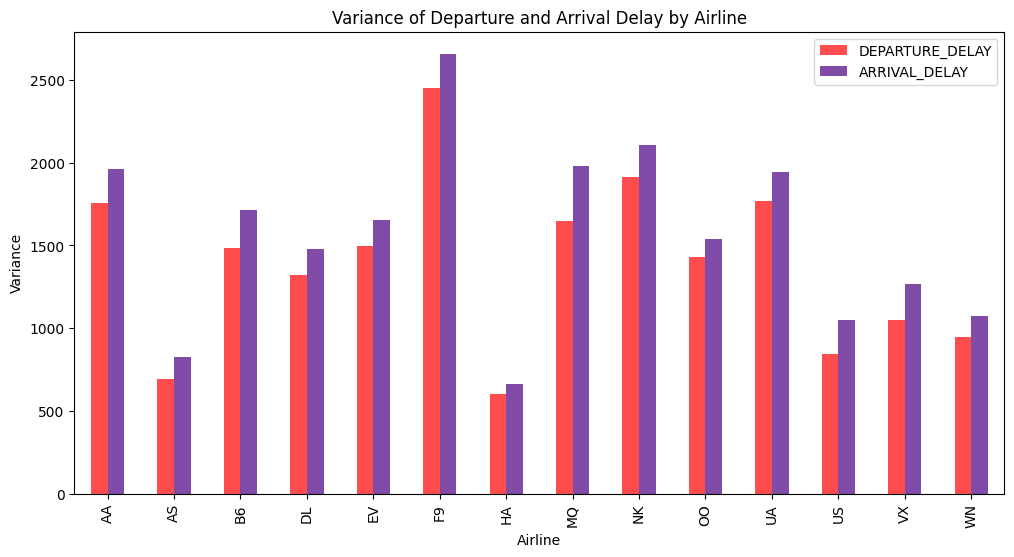

In [10]:
# Calculate the variances of DEPARTURE_DELAY and ARRIVAL_DELAY for each airline
variances = data.groupby('AIRLINE')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].var()

# Plot the variances using a bar plot
ax = variances.plot(kind='bar', figsize=(12, 6), color=['red', 'indigo'], alpha=0.7)

# Set the plot title and labels
ax.set_title('Variance of Departure and Arrival Delay by Airline')
ax.set_xlabel('Airline')
ax.set_ylabel('Variance')

# Show the plot
plt.show()

> The x-axis represents the different airlines, while the y-axis shows the variance of the delay times in minutes squared.
> 
> From the plot, we can see that the airlines with the highest variances in both departure and arrival delay times are "*Frontier Airlines*", "*Spirit Airlines*"  and "*JetBlue Airways*". Conversely, "*Alaska Airlines*" and "*Hawaiian Airlines*" have the lowest variances for both departure and arrival delays.
>
> The plot is useful for identifying airlines that have consistently high or low variances in their delay times, which can help inform decisions around which airlines to choose for future travel.

## Data Pre-processing

### a) Data cleaning: Find missing data. Remove them and justify your choice.


> *'isnull().sum()'* calculates the null data in the dataframe which will be helpful in cleaning data as it allows you to identify which columns have missing values and how many missing values are there in each column. 

By knowing the number of missing values in each column, we can make informed decisions on how to handle the missing data, such as filling in the missing data or removing rows with missing data. It can also give us an idea of how much missing data there is overall in the dataset and how much data needs to be imputed or removed.






In [11]:
# Displays total null values for every column
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

> As per the output, it can be seen that *'CANCELLATION_REASON', 'SECURITY_DELAY,'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'* columns have the most null data. So, these columns and the *'YEAR, 'DAY' and 'DAY_OF_WEEK'* can be dropped. 
> Standardization and normalization will give invalid or useless information on Date related data. This can happen if date related columns are int or float datatype instead of datetime datatype.

In [12]:
# Dropping the columns for cleaner data
clean_data = data.drop(columns=['YEAR','DAY', 'DAY_OF_WEEK','CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', \
                                'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])

> Now we will drop any null rows. This will clean the data by removing unrequired any rows which are empty. This will reduce the size of dataframe which means less memory would be required to perform any operations.

In [13]:
# Drop any null rows (if any)
clean_data.dropna(axis=0,inplace=True)

### b) Data Cleaning: Identify noise in the data. How did you identify the noise? Justify and demonstrate the technique you would use to reduce noise.


> Binning technique is used to identify noise in the data. Binning is the process of dividing the range of continuous numeric variables into a set of smaller intervals or bins, and then assigning a categorical label or a numeric value to each bin. 
> In this case, the *DEPARTURE_DELAY* column is considered for identify noise is divided into 10 bins using the minimum and maximum values in the data, and the bin number is assigned to each row in a new column called bin_number.
>
> By examining the distribution of data points across the bins, it is possible to identify if there are any outliers or unusual values that can be considered as noise. For example, if a bin contains a very small number of data points compared to other bins, or if there are large differences in the number of data points between adjacent bins, it can indicate the presence of noise or outliers.


In [14]:
# Dropping any null values in the column 'Departure_Delay'
clean_data = clean_data.dropna(subset=['DEPARTURE_DELAY'])

In [15]:
# Calculate the minimum and maximum values in the data
data_min = clean_data['DEPARTURE_DELAY'].min()
data_max = clean_data['DEPARTURE_DELAY'].max()

# Set the number of bins
num_bins = 10

# Calculate the bin size
bin_size = (data_max - data_min) / num_bins

# Create the bin edges
bin_edges = np.arange(data_min, data_max + bin_size, bin_size)

# Create a new column to store the bin numbers
clean_data['bin_number'] = pd.cut(clean_data['DEPARTURE_DELAY'], bin_edges, labels=False)

# Checks for any null values in the column
clean_data['DEPARTURE_DELAY'].isnull().sum()

0

> We will check the bin number for any null values in the *'DEPARTURE_DELAY'* column using the *'.unique()'* method. This will help to determine if there are any rows with nan or null values for bin_number. 

In [16]:
# Returns all the unique values for the column
clean_data['bin_number'].unique()

array([ 0.,  1.,  2.,  6.,  4.,  3.,  7.,  5.,  8.,  9., nan])

> Rows with 'NaN' values are outliers. So, we can fill the missing data with median of the column.
> Then we can calculate the mean and standard deviation for each bin of the column *'DEPARTURE_DELAY'*.
>
> We will calculate the noise for each bin which helps in identifying the range of values that are considered as outliers or noise. In this case, the noise threshold is calculated as the mean plus two times the standard deviation for each bin. This means that any values outside this range can be considered as noise or outliers and can be removed from the dataset. The value of two times the standard deviation is a commonly used threshold for identifying outliers, as it corresponds to approximately 95% of the data in a normal distribution.


In [17]:
# Replace NaN values with median of the column
clean_data['bin_number'].fillna(clean_data['bin_number'].median(), inplace=True)

# Calculate the mean delay for each bin
bin_means = clean_data.groupby('bin_number')['DEPARTURE_DELAY'].mean()

# Calculate the standard deviation for each bin
bin_stds = clean_data.groupby('bin_number')['DEPARTURE_DELAY'].std()

# Calculate the noise for each bin
bin_noise = bin_means + 2 * bin_stds

# Print the noise for each bin
print(bin_noise)

bin_number
0.0      47.330126
1.0     279.599299
2.0     511.413813
3.0     742.574236
4.0     954.820150
5.0    1158.404991
6.0    1360.153974
7.0    1588.950684
8.0    1677.491903
9.0    2088.563492
Name: DEPARTURE_DELAY, dtype: float64


> Then we will create a new column called *'noise_flag'*, which flags any departure delays that exceed the noise threshold for their respective bins. 
>
> This technique is useful for identifying and removing noisy data because it allows us to identify the expected range of values for each bin, based on the mean and standard deviation of the data within that bin. Any data points that fall outside of this expected range can be considered as outliers or noisy data, and are filtered out of the dataset.
>
> So, the noisy data is filtered out the by selecting only the rows where the *'noise_flag'* column is False. 


In [18]:
# Create a new column to flag delays that exceed the noise threshold
clean_data['noise_flag'] = clean_data['DEPARTURE_DELAY'] > bin_noise[clean_data['bin_number']].values

# Filter out the outliers
clean_data = clean_data[~clean_data['noise_flag']]

### c) Data transformations: Perform standardizations and normalization. Justify your chosen normalization method.


> Standardization scales the variables so that they have zero mean and unit variance. This is done by subtracting the mean of each variable from the data and then dividing by its standard deviation. This results in a dataset where each variable has a mean of zero and a standard deviation of one. Standardization is useful when the variables have different scales and units, and we want to ensure that they are all on the same scale.

> Normalization scales the variables so that they have values between 0 and 1. This is done by subtracting the minimum value of each variable from the data and then dividing by the range of the variable (i.e., the difference between the maximum and minimum values). This results in a dataset where each variable has a minimum value of 0 and a maximum value of 1. Normalization is useful when the variables have similar scales and we want to ensure that they are all within the same range.

In [19]:
# Importing the required packages from the library
from sklearn.preprocessing import StandardScaler, MinMaxScaler


> *StandardScaler()* is robust to outliers and is less sensitive to the range of values, which makes it a good choice for datasets that may have outliers or extreme values. It is also considered one of the best methods for standardization and is widely used in data preprocessing for machine learning.


In [20]:
# Get the numerical columns to perform standardization and normalization
num_cols = clean_data.select_dtypes(include=np.number).columns.tolist()

# Standardize the numerical columns
scaler = StandardScaler()
std_data = pd.DataFrame(scaler.fit_transform(clean_data[num_cols]), columns=num_cols)

In [21]:
# Prints the top 5 rows of standardized data
std_data.head()

,MONTH,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,bin_number
0,-1.637415,-1.177353,-2.715204,2.102797,-0.500936,0.579075,-2.685573,0.838314,0.769217,0.767844,1.023794,-2.069463,-0.615830,-2.087404,-2.058629,-0.640004,0.0,0.0,-0.127317
1,-1.637415,0.099744,-2.704860,-2.672540,-0.407440,-0.458613,-2.687598,1.833086,1.913407,2.067376,2.470911,-1.419329,-0.615830,-1.453253,-1.413022,-0.264104,0.0,0.0,-0.127317
2,-1.637415,-0.753937,-2.684173,-2.640055,-0.220447,0.002582,-2.647088,1.912668,2.101862,2.108851,2.415126,-1.296330,0.644792,-1.342276,-1.277309,0.140712,0.0,0.0,-0.127317
3,-1.637415,-1.086050,-2.684173,-2.646146,-0.313943,-0.112717,-2.655190,1.899404,1.940330,1.998252,2.490599,-1.397853,0.104526,-1.344258,-1.383941,-0.264104,0.0,0.0,-0.127317
4,-1.637415,-1.156239,-2.673829,-2.627873,-0.189282,-0.573911,-2.645062,1.236223,1.051899,1.182588,1.023794,-2.362317,-0.435741,-2.305394,-2.347504,-0.611088,0.0,0.0,-0.127317


> *MinMaxScaler()* is a good choice for normalization in this case because it scales the data to a fixed range of 0 to 1 which is particularly useful for this data because different columns may have vastly different ranges of values. 
>
> For example, the *DEPARTURE_DELAY* column may have values ranging from -60 to 2000, while the *DISTANCE* column may have values ranging from 0 to 5000. By normalizing these columns using MinMaxScaler, they are all scaled to the same range of 0 to 1, which allows for easier comparison and analysis of the data. MinMaxScaler also preserves the shape of the distribution of the original data, which can be important for some analyses. 

In [22]:
# Normalize the numerical columns
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(clean_data[num_cols]), columns=num_cols)

In [23]:
# Prints the top 5 rows of normalized data
norm_data.head()

,MONTH,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,bin_number
0,0.0,0.010409,0.001696,0.980825,0.034300,0.089286,0.005836,0.267143,0.239362,0.237189,0.286147,0.167987,0.012146,0.181934,0.169654,0.031584,0.0,0.0,0.0
1,0.0,0.250563,0.003817,0.000417,0.035749,0.049107,0.005419,0.374286,0.352394,0.374817,0.464257,0.306794,0.012146,0.317642,0.308462,0.037901,0.0,0.0,0.0
2,0.0,0.090031,0.008058,0.007086,0.038647,0.066964,0.013756,0.382857,0.371011,0.379209,0.457391,0.333055,0.040486,0.341391,0.337641,0.044704,0.0,0.0,0.0
3,0.0,0.027578,0.008058,0.005836,0.037198,0.062500,0.012088,0.381429,0.355053,0.367496,0.466680,0.311380,0.028340,0.340967,0.314714,0.037901,0.0,0.0,0.0
4,0.0,0.014379,0.010178,0.009587,0.039130,0.044643,0.014173,0.310000,0.267287,0.281113,0.286147,0.105461,0.016194,0.135284,0.107545,0.032070,0.0,0.0,0.0


### d) Any other techniques which are required for your dataset such as adding data head

> Converting the numerical representation of months in the *'MONTH'* column of the *clean_data* dataframe to their corresponding month names which will be useful for performing data cube aggregration on column *'MONTH'*

In [24]:
import datetime

# define a dictionary to map integer month values to month names
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# convert the month column to datetime format
clean_data['MONTH'] = pd.to_datetime(clean_data['MONTH'], format='%m')

# map the integer month values to month names using the dictionary
clean_data['MONTH'] = clean_data['MONTH'].dt.month.map(month_dict)


In [25]:
clean_data['MONTH'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

> We will group the *clean_data* dataframe by *month* and calculate the mean departure delay for each month. The resulting output agg_data represents the mean departure delay for every month. It shows that highest amount of delays occurred in the months of June, July, December and January which comes under holiday periods.

In [26]:
# Group the data by Month and calculate the mean of the Delayed flights for each month
agg_data = clean_data.groupby('MONTH')['DEPARTURE_DELAY'].mean()

# Display the aggregated data
agg_data

MONTH
April        3.969837
August       5.355843
December     7.006570
February     6.747354
January      5.179913
July         6.310167
June         8.327292
March        5.403265
May          5.096696
November     3.604090
October      2.209347
September    1.892759
Name: DEPARTURE_DELAY, dtype: float64

> We will do the same on *'DEPARTURE_DELAY', 'ARRIVAL_DELAY'* columns for every *Airline*. The resulting output aggregated_data is a dataframe with airlines as index and the mean departure and arrival delays as columns.
> This aggregrated data gives an idea about which airlines have highest average delays.

In [27]:
# Calculate the mean of DEPARTURE_DELAY and ARRIVAL_DELAY columns for each group
aggregated_data = clean_data.groupby('AIRLINE')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()

# Print the aggregated data
aggregated_data

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE,,
AA,4.688340,-0.693426
AS,-0.643949,-3.338727
B6,6.123719,1.213844
DL,4.346116,-2.841747
EV,3.946506,1.880295
F9,7.531629,6.666883
HA,-0.664718,0.884801
MQ,4.937648,1.079231
NK,8.998552,7.512383


> PCA is a technique used to reduce the dimensionality of a dataset by transforming it into a smaller number of new variables (principal components) that capture the most important information in the original data.

> Performing PCA on the standardized data is a good approach as it can help in reducing the dimensionality of the dataset while retaining the most important information. This can make it easier to analyze the data and identify patterns or trends that may be difficult to see in high-dimensional data. 
> 
> Additionally, PCA can also help in identifying any underlying structures or relationships among the variables in the dataset.

In [28]:
from sklearn.decomposition import PCA

# Perform PCA on the standardized numerical data
pca = PCA()
pca.fit(std_data)

# Get the transformed data
pca_data = pca.transform(std_data)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [2.96623265e-01 2.42520101e-01 1.64822888e-01 6.27918075e-02
 5.89427639e-02 5.84630009e-02 4.79801541e-02 4.48825206e-02
 7.29082988e-03 6.58378715e-03 2.82401432e-03 2.53669766e-03
 1.69144271e-03 1.03811157e-03 1.00861545e-03 4.10685852e-12
 1.28464423e-31 1.13566664e-70 0.00000000e+00]


In [29]:
pca_data

array([[-3.84185738e+00,  1.95301077e+00, -1.64084755e-01, ...,
         3.34727849e-15, -3.97498775e-30,  0.00000000e+00],
       [-4.95327199e+00,  4.14148707e+00, -1.14447929e-01, ...,
        -3.39959063e-15,  2.52871301e-31,  0.00000000e+00],
       [-4.71494594e+00,  4.55968309e+00,  2.76918130e-01, ...,
        -2.85481206e-15,  5.90898805e-32,  0.00000000e+00],
       ...,
       [-1.81956791e+00,  2.29854527e+00, -1.93519723e-01, ...,
         2.73898995e-15,  2.35809582e-30,  0.00000000e+00],
       [-2.09870520e+00,  8.13992530e-01, -2.03328138e-01, ...,
         4.44462638e-15,  2.06231262e-30,  0.00000000e+00],
       [-3.65507350e+00,  2.29766957e+00,  4.20804820e-01, ...,
        -1.14701573e-16,  5.86574016e-30,  0.00000000e+00]])